### Code

In [1]:
import re
import matplotlib.pyplot as plt
import os

def extract_and_plot_mae(root_folder):
    pattern_epoch = re.compile(r"Epoch (\d+)/\d+")
    pattern_trn = re.compile(r"\[trn set\]\n.*?age \(mae\): ([\d\.]+)")
    pattern_val = re.compile(r"\[val set\]\n.*?age \(mae\): ([\d\.]+)")
    pattern_tst = re.compile(r"\[tst set\]\n.*?age \(mae\): ([\d\.]+)")
    
    fig, axes = plt.subplots(1, 5, figsize=(40, 5))
    
    for i in range(5):
        log_file_path = os.path.join(root_folder, f"split{i}", "training.log")
        
        if not os.path.exists(log_file_path):
            print(f"Log file not found: {log_file_path}")
            continue
        
        epochs, trn_mae, val_mae, tst_mae = [], [], [], []
        
        with open(log_file_path, "r") as f:
            log_data = f.read()
        
        epoch_matches = pattern_epoch.findall(log_data)
        trn_matches = pattern_trn.findall(log_data)
        val_matches = pattern_val.findall(log_data)
        tst_matches = pattern_tst.findall(log_data)
        
        min_length = min(len(epoch_matches), len(trn_matches), len(val_matches), len(tst_matches))
        max_length = max(len(epoch_matches), len(trn_matches), len(val_matches), len(tst_matches))
        num_skips = max_length - min_length
        
        for j in range(min_length):
            epochs.append(int(epoch_matches[j + num_skips]))
            trn_mae.append(float(trn_matches[j]))
            val_mae.append(float(val_matches[j]))
            tst_mae.append(float(tst_matches[j]))
        
        axes[i].plot(epochs, trn_mae, label='Train MAE', marker='o')
        axes[i].plot(epochs, val_mae, label='Validation MAE', marker='s')
        axes[i].plot(epochs, tst_mae, label='Test MAE', marker='^')
        axes[i].set_xlabel("Epoch")
        axes[i].set_xticks(list(range(max_length)))
        axes[i].set_xticklabels(list(range(max_length)), rotation=90)
        axes[i].set_ylabel("MAE")
        axes[i].set_title(f"Split {i}")
        axes[i].legend()
        axes[i].grid()
    
    plt.tight_layout()
    plt.show()

# Example usage
# extract_and_plot_mae("path/to/root/folder")


### Adience_256x256_resnet50_imagenet_noisy_dldl_v2_clean_carl

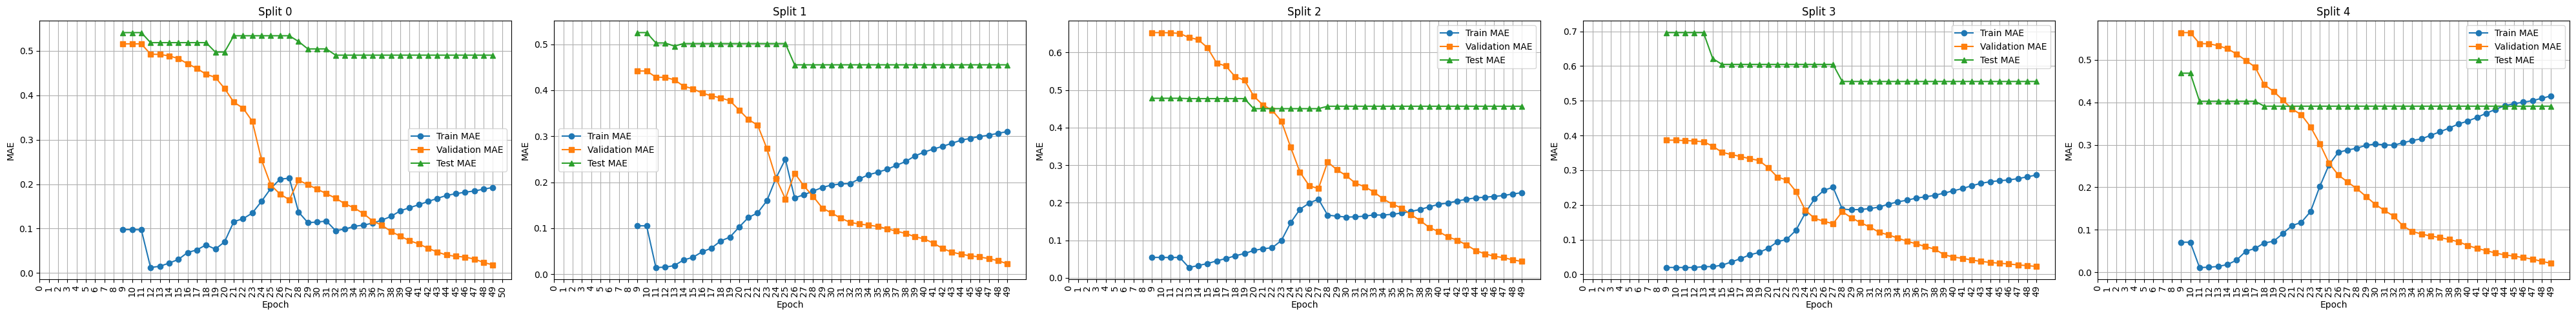

In [2]:
extract_and_plot_mae("facebase/results/Adience_256x256_resnet50_imagenet_noisy_dldl_v2_clean_carl")

### Adience_256x256_resnet50_imagenet_noisy_dldl_v2_carl_v4

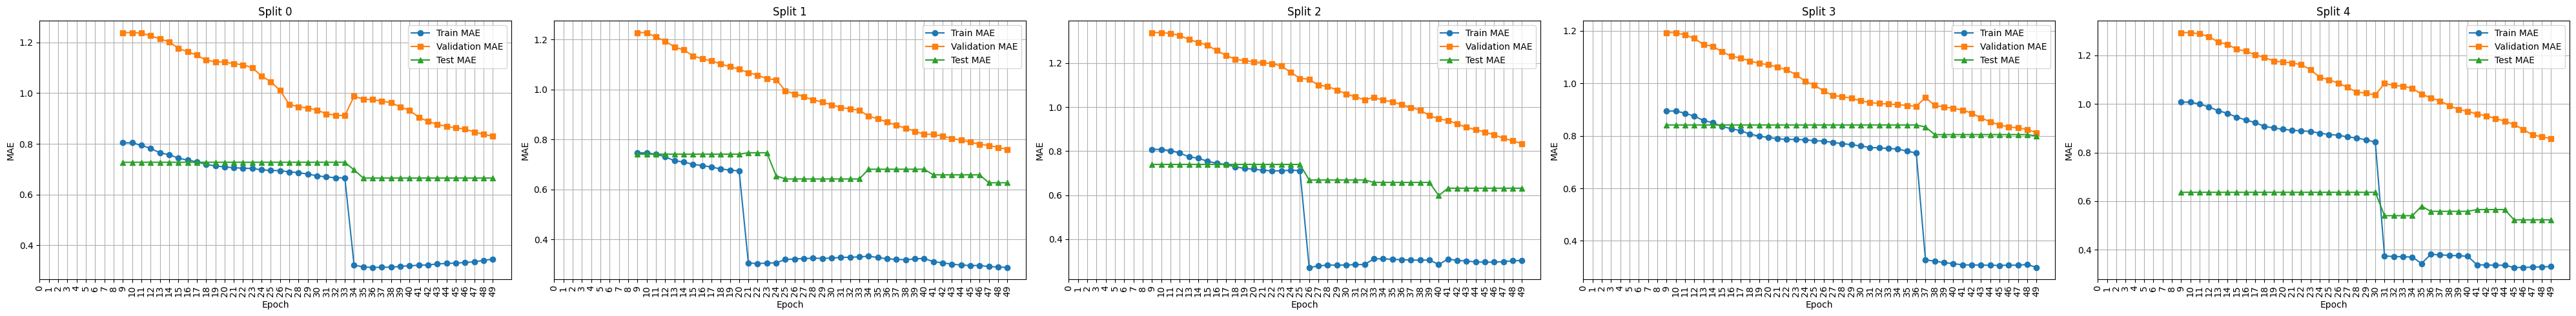

In [3]:
extract_and_plot_mae("facebase/results/Adience_256x256_resnet50_imagenet_noisy_dldl_v2_carl_v4")

### Adience_256x256_resnet50_imagenet_noisy_dldl_v2_sync_v5

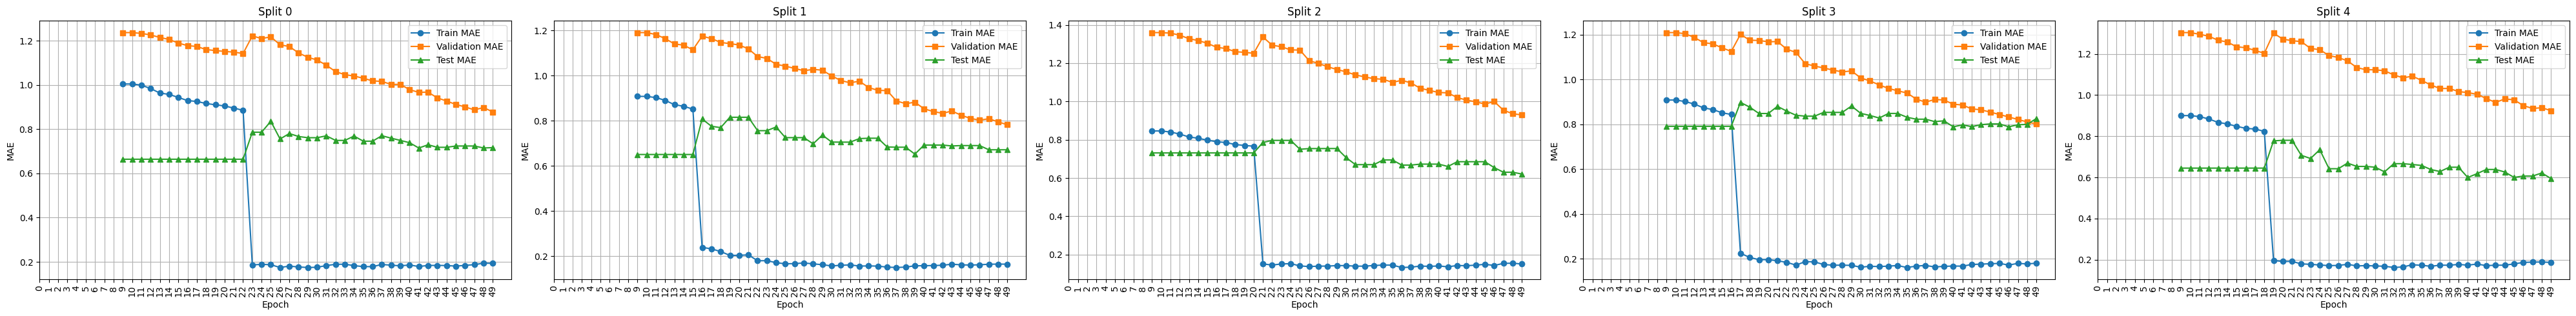

In [2]:
extract_and_plot_mae("facebase/results/Adience_256x256_resnet50_imagenet_noisy_dldl_v2_sync_qcarl")

### Adience_256x256_resnet50_imagenet_noisy_dldl_v2_clean_carl

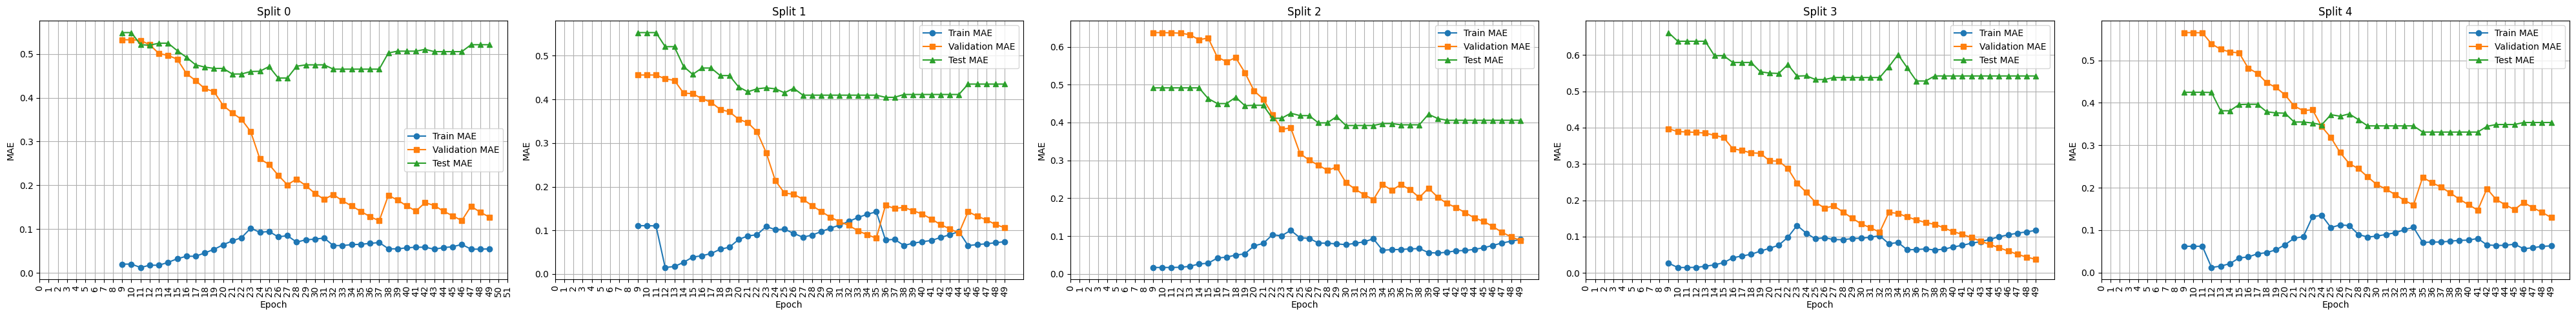

In [3]:
extract_and_plot_mae("facebase/results/Adience_256x256_resnet50_imagenet_noisy_dldl_v2_clean_carl")

### Adience_256x256_resnet50_imagenet_noisy_dldl_v2_smcarl

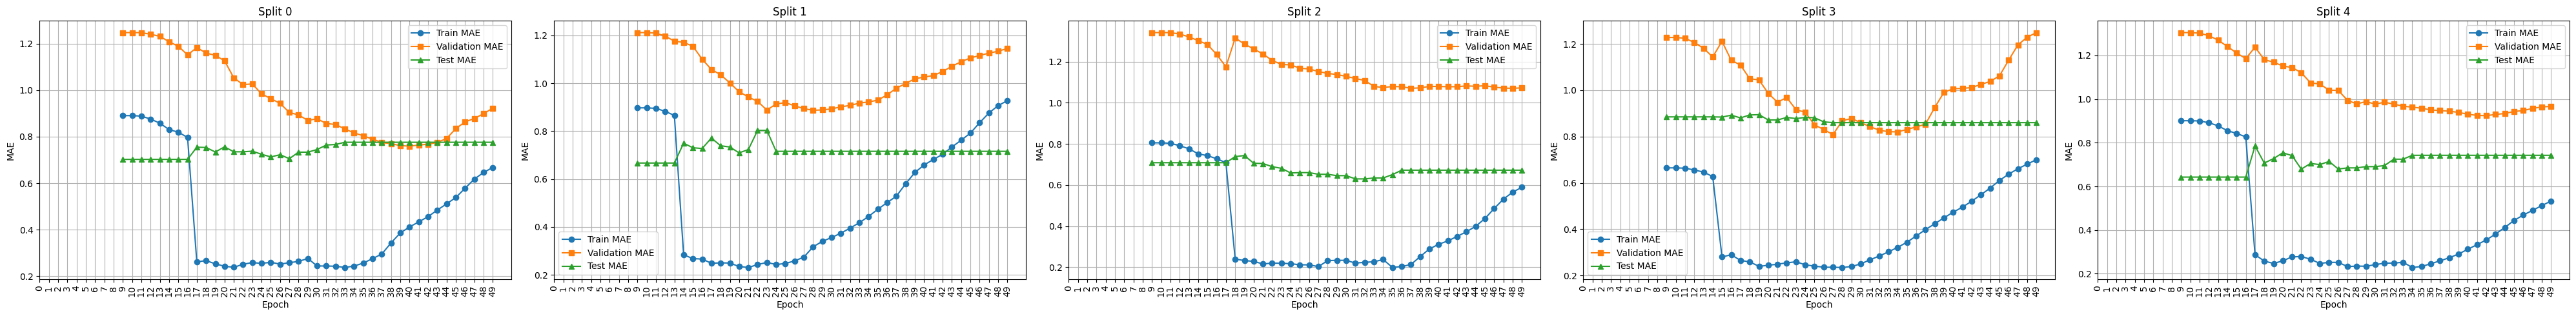

In [2]:
extract_and_plot_mae("facebase/results/Adience_256x256_resnet50_imagenet_noisy_dldl_v2_smcarl")